##### import important library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1. Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022

##### Load CSV file and analyze it

In [2]:

df = pd.read_csv("finaldataset.csv")

df['order_date'] = pd.to_datetime(df['order_date'])

df['year'] = df['order_date'].dt.year

df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_price,cogs,category,registered_date,payment_method,month_id,month_name,day_name,year
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,...,emart_Magic Hose Pipe 75 Ft,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet,2,February,Wednesday,2022
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,...,sheraton_FMOTORS_01,159500.0,97266.0,Health & Sports,2022-08-15,cod,10,October,Saturday,2022
2,ODR1119282607l,C192625L,2021-08-07,P146984,919300,1,919300.0,0.0,919300.0,1,...,tcl_ 24 inch D2720 HD Ready LED TV,919300.0,671060.0,Entertainment,2021-07-27,ublcreditcard,8,August,Saturday,2021
3,ODR1119964698b,C225180L,2021-08-11,P523149,59856,1,59856.0,0.0,59856.0,1,...,phub_Hope by Rasasi 75ml EDP,59856.0,53824.0,Beauty & Grooming,2021-10-11,cod,8,August,Wednesday,2021
4,ODR1120310291y,C708473L,2021-09-18,P692619,34510,1,34510.0,0.0,34510.0,1,...,Progressive_9781474813860,34510.0,29290.0,Books,2021-07-02,cod,9,September,Saturday,2021


In [3]:
# filter other-category data for 2021 / 2022 #
others_2021 = df[(df['category'] == 'Others') & (df['year'] == 2021) & (df['is_valid'] == 1)]
others_2022 = df[(df['category'] == 'Others') & (df['year'] == 2022) & (df['is_valid'] == 1)]

sales_2021 = others_2021.groupby('sku_name')['qty_ordered'].sum().reset_index().rename(columns={'qty_ordered': 'qty_2021'})
sales_2022 = others_2022.groupby('sku_name')['qty_ordered'].sum().reset_index().rename(columns={'qty_ordered': 'qty_2022'})


In [4]:
# Merge datasets
merged = pd.merge(sales_2021, sales_2022, on='sku_name', how='outer').fillna(0)

merged['diff'] = merged['qty_2022'] - merged['qty_2021']
merged['pct_change'] = ((merged['diff']) / merged['qty_2021'].replace(0, 1)) * 100


In [5]:
def classify_change(pct):
    if pct < -10:
        return "DOWN"
    elif pct > 10:
        return "UP"
    else:
        return "FAIR"

merged['status'] = merged['pct_change'].apply(classify_change)


In [6]:
top_20_down = merged.sort_values(by='diff').head(20)

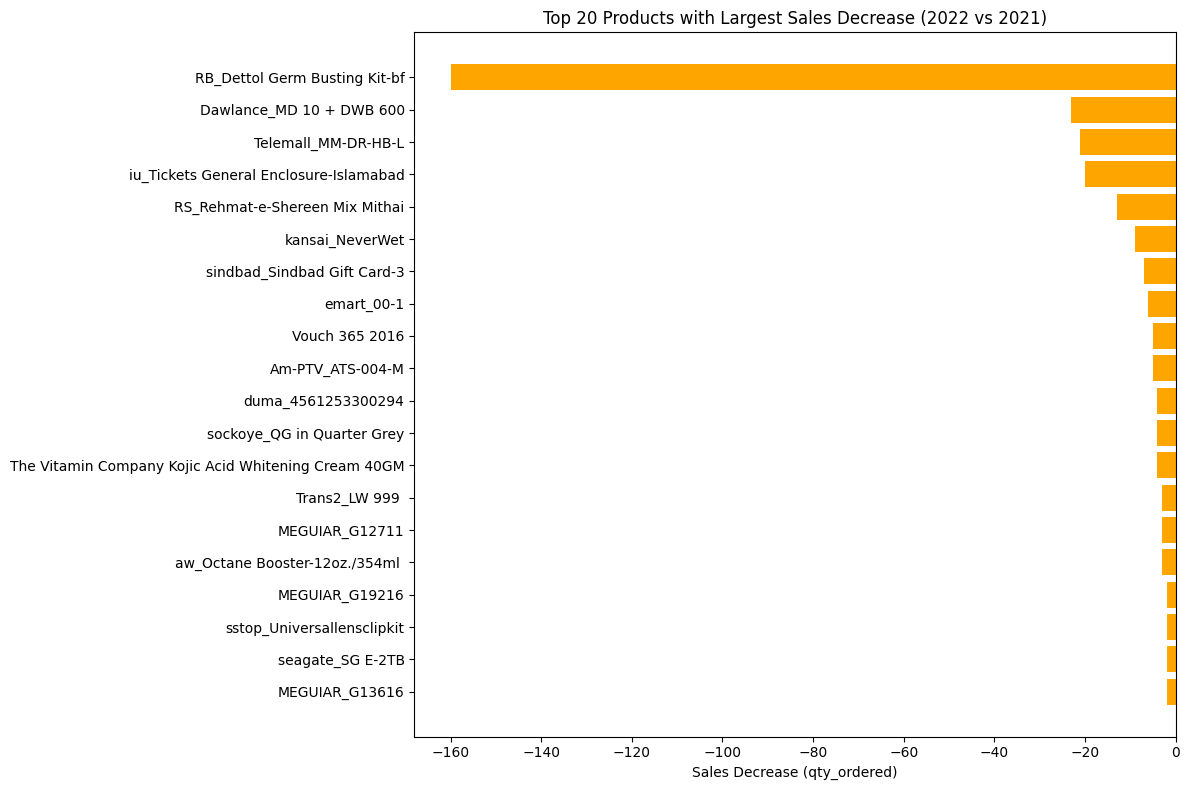

In [7]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_down['sku_name'], top_20_down['diff'], color='orange')
plt.xlabel("Sales Decrease (qty_ordered)")
plt.title("Top 20 Products with Largest Sales Decrease (2022 vs 2021)")
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()


#### Task 2: Comparing Weekend and Weekday Sales in Q4 2022

In [11]:
# Filter for Q4 2022 data (October, November, December 2022)
df_q4 = df[(df['order_date'].dt.year == 2022) & (df['order_date'].dt.month.isin([10, 11, 12]))].copy()

# Create new columns for month and day of the week
df_q4['month'] = df_q4['order_date'].dt.month_name()
df_q4['day_name'] = df_q4['order_date'].dt.day_name()

# Add a column for 'weekend' or 'weekday'
df_q4['day_type'] = df_q4['day_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


In [9]:
# Group by month and day_type to get average daily sales
monthly_comparison = df_q4.groupby(['month', 'day_type'])['before_discount'].mean().reset_index()

In [16]:
# Overall Q4 comparison
overall_comparison = df_q4.groupby('day_type')['before_discount'].mean().reset_index()

print(" Monthly Weekend vs Weekday Average Sales:")
print(monthly_comparison)

print("\n Overall Q4 Weekend vs Weekday Average Sales:")
print(overall_comparison)

 Monthly Weekend vs Weekday Average Sales:
      month day_type  before_discount
0  December  Weekday     9.632348e+05
1  December  Weekend     1.008580e+06
2  November  Weekday     1.287936e+06
3  November  Weekend     1.046216e+06
4   October  Weekday     1.149573e+06
5   October  Weekend     9.971162e+05

 Overall Q4 Weekend vs Weekday Average Sales:
  day_type  before_discount
0  Weekday     1.135207e+06
1  Weekend     1.014335e+06


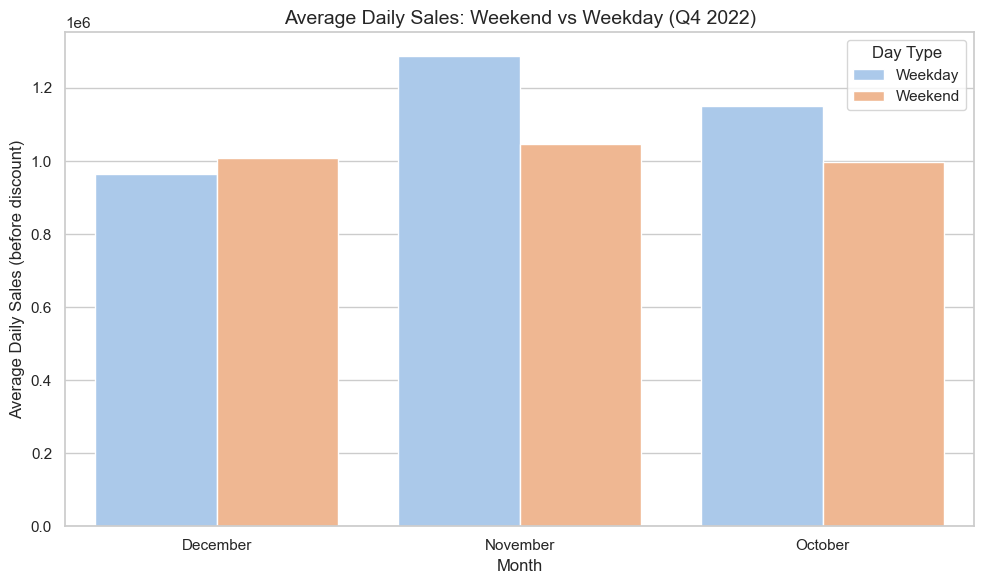

In [15]:
sns.set(style="whitegrid")

# Bar chart for average daily sales: Weekend vs Weekday in Q4 2022
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='before_discount', hue='day_type', data=monthly_comparison, palette='pastel')
plt.title('Average Daily Sales: Weekend vs Weekday (Q4 2022)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Daily Sales (before discount)')
plt.legend(title='Day Type')

plt.tight_layout()
plt.show()

#### Task 3: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category

In [17]:
# Filter for 2022, Mobiles & Tablets category, and valid orders
df_mobiles = df[
    (df['order_date'].dt.year == 2022) &
    (df['category'] == 'Mobiles & Tablets') &
    (df['is_valid'] == 1)
]

# Group by product and sum quantity ordered
top_products = df_mobiles.groupby(['sku_name', 'category'])['qty_ordered'].sum().reset_index()

In [18]:
# Sort and get top 5
top_5_products = top_products.sort_values(by='qty_ordered', ascending=False).head(5)

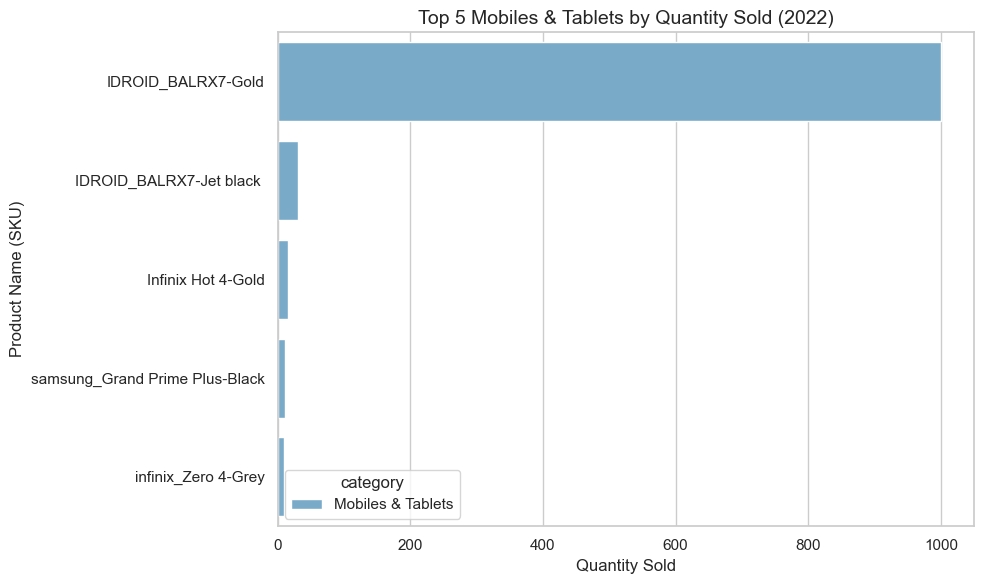

In [22]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='qty_ordered', y='sku_name', hue='category', data=top_5_products, palette='Blues_r')
plt.title('Top 5 Mobiles & Tablets by Quantity Sold (2022)', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name (SKU)')
plt.tight_layout()
plt.show()

#### Task 4: Average Quantity Sold per Product by Category

In [23]:
# Group by category and calculate average quantity sold
avg_qty_per_category = df.groupby('category')['qty_ordered'].mean().reset_index()

# Sort by average quantity in descending order
avg_qty_per_category = avg_qty_per_category.sort_values(by='qty_ordered', ascending=False)

C:\Users\Bhagirath Bhati\AppData\Local\Temp\ipykernel_21392\1716785578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='qty_ordered', y='category', data=avg_qty_per_category, legend='False', palette='coolwarm')


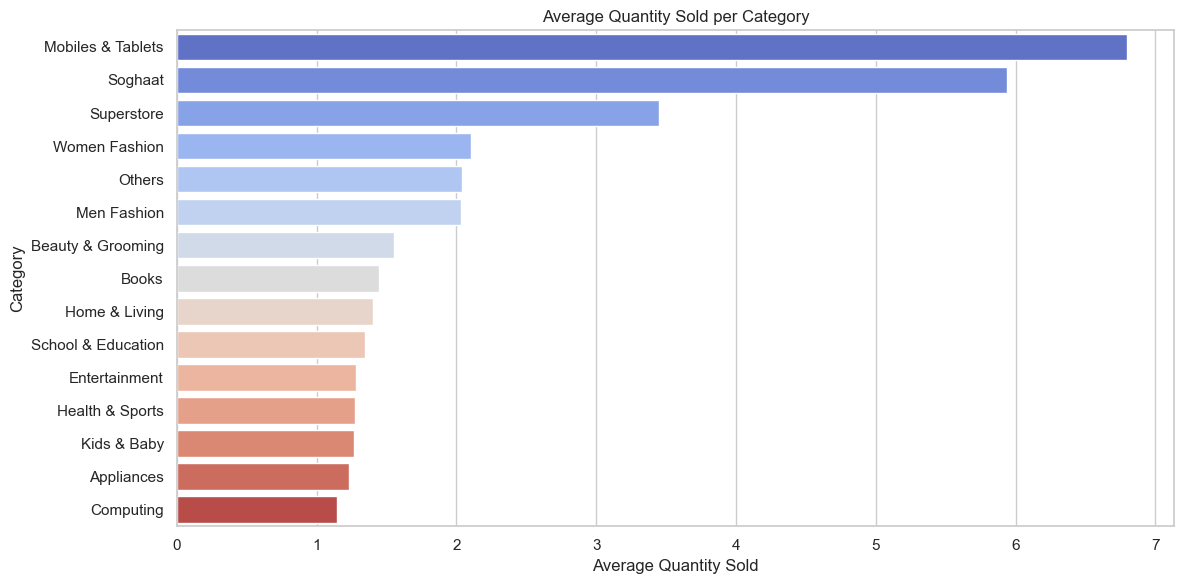

In [26]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='qty_ordered', y='category', data=avg_qty_per_category, palette='coolwarm')
plt.title('Average Quantity Sold per Category')
plt.xlabel('Average Quantity Sold')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#### Task 5: Sales Performance Based on Payment Method

In [27]:
# Calculate net profit for each row
df['net_profit'] = df['after_discount'] - df['cogs']

# Group by payment method and calculate required metrics
payment_summary = df.groupby('payment_method').agg(
    total_sales=('before_discount', 'sum'),
    total_quantity_sold=('qty_ordered', 'sum'),
    total_net_profit=('net_profit', 'sum')
).reset_index()

# Display the result
print(payment_summary)

       payment_method   total_sales  total_quantity_sold  total_net_profit
0             Easypay  7.981642e+08                  616      2.894657e+08
1          Easypay_MA  1.022845e+08                   47      8.130724e+07
2             Payaxis  2.363378e+09                 1633      8.994414e+08
3      cashatdoorstep  8.508335e+07                  209      7.095988e+07
4                 cod  2.896853e+09                 7408      9.193044e+08
5      customercredit  7.895198e+07                  182      2.291325e+07
6     easypay_voucher  2.733621e+07                   20      6.641630e+06
7   financesettlement  1.961480e+07                   28      1.528330e+07
8     internetbanking  1.200515e+08                   69      6.294921e+07
9         jazzvoucher  1.181141e+09                 2096      1.097907e+09
10         jazzwallet  8.010489e+07                  662      2.898269e+07
11   marketingexpense  5.872500e+05                    5      5.097620e+05
12            mcblite  9.

#### Task 6: Product Category Performance by Net Profit.

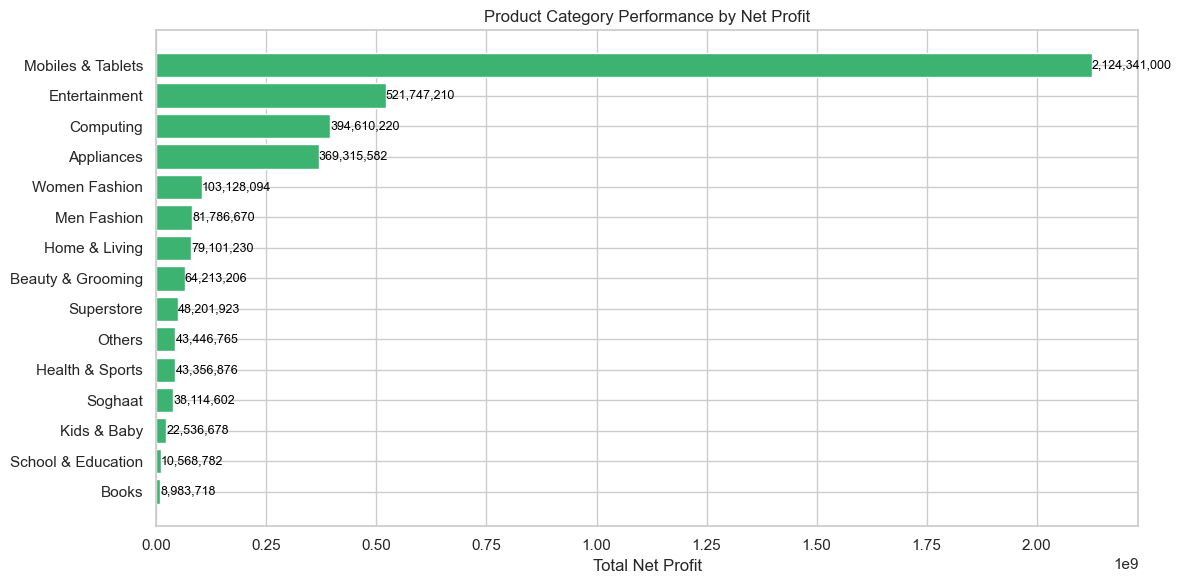

In [35]:
# Group by category and calculate total net profit
category_profit = df.groupby('category')['net_profit'].sum().sort_values(ascending=False).reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(category_profit['category'], category_profit['net_profit'], color='mediumseagreen')
plt.xlabel('Total Net Profit')
plt.title('Product Category Performance by Net Profit')
plt.gca().invert_yaxis()  # Highest on top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',  # format the number nicely, no decimals
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()